In [29]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
!pip install optuna
import optuna

In [3]:
url = "https://raw.githubusercontent.com/PRABHAV-RA2011003011010/Graduate_Admission_Prediction/refs/heads/main/Admission_Predict.csv"
df = pd.read_csv(url)
print(df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [4]:
df.shape

(400, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop(columns=['Serial No.'],inplace=True)

In [8]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]

In [10]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [11]:
Y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
395,0.82
396,0.84
397,0.91
398,0.67


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [13]:
X_train.shape

(320, 7)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [15]:
X_train_scaled[0]

array([0.22      , 0.17857143, 0.25      , 0.5       , 0.42857143,
       0.25      , 1.        ])

Covert Numpy arrays to Pytorch tensors

In [16]:
X_train_tensor = torch.from_numpy(X_train.values.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.values.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.values.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.values.astype(np.float32))

In [17]:
y_train_tensor

tensor([0.4400, 0.9500, 0.7100, 0.6200, 0.6400, 0.4700, 0.7300, 0.9600, 0.7100,
        0.7800, 0.5200, 0.7300, 0.8000, 0.8100, 0.5300, 0.6200, 0.7000, 0.7900,
        0.8700, 0.8900, 0.9200, 0.5700, 0.7300, 0.4400, 0.7400, 0.8400, 0.8400,
        0.6400, 0.9000, 0.7400, 0.7100, 0.4700, 0.9000, 0.6300, 0.7500, 0.3800,
        0.7200, 0.8000, 0.8400, 0.8200, 0.4800, 0.6400, 0.6200, 0.7500, 0.7300,
        0.4200, 0.9400, 0.7800, 0.7000, 0.9500, 0.7100, 0.6400, 0.7200, 0.8900,
        0.7000, 0.6800, 0.6400, 0.7700, 0.5700, 0.3400, 0.6100, 0.6700, 0.6100,
        0.8000, 0.6900, 0.5600, 0.6200, 0.4500, 0.8900, 0.6600, 0.7700, 0.9200,
        0.6900, 0.8800, 0.8200, 0.7500, 0.9400, 0.5200, 0.9300, 0.6400, 0.6800,
        0.7100, 0.5600, 0.8100, 0.7000, 0.5300, 0.5700, 0.7300, 0.8700, 0.7000,
        0.4700, 0.8400, 0.8000, 0.9300, 0.8600, 0.8300, 0.6200, 0.7100, 0.9400,
        0.6100, 0.8500, 0.8100, 0.8200, 0.3900, 0.8000, 0.6200, 0.9200, 0.6100,
        0.5200, 0.9100, 0.5400, 0.8500, 

In [18]:
y_train_tensor.shape

torch.Size([320])

Pytorch Starts!!!

In [19]:
#Dataset and DataLoader
from torch.utils.data import Dataset,DataLoader

In [20]:
class CustomDataset(Dataset):

  def __init__(self,x_tensor,y_tensor):
    self.x=x_tensor
    self.y=y_tensor

  def __len__(self):
    return len(self.x)

  def __getitem__(self,index):
    return (self.x[index],self.y[index])

In [21]:
train_dataset = CustomDataset(X_train_tensor,y_train_tensor)
test_dataset = CustomDataset(X_test_tensor,y_test_tensor)

In [22]:
len(test_dataset)

80

In [23]:
train_dataset[0]

(tensor([301.0000,  97.0000,   2.0000,   3.0000,   3.0000,   7.8800,   1.0000]),
 tensor(0.4400))

In [24]:
batch_size=16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

In [26]:
print(train_loader)

In [27]:
for X,Y in train_loader:
  print(X)
  print(Y)
  print("."*50)

tensor([[320.0000, 120.0000,   3.0000,   4.0000,   4.5000,   9.1100,   0.0000],
        [316.0000, 109.0000,   4.0000,   4.5000,   3.5000,   8.7600,   1.0000],
        [319.0000, 108.0000,   2.0000,   2.5000,   3.0000,   8.7600,   0.0000],
        [311.0000, 106.0000,   2.0000,   3.5000,   3.0000,   8.2600,   1.0000],
        [309.0000, 106.0000,   2.0000,   2.5000,   2.5000,   8.0000,   0.0000],
        [302.0000, 102.0000,   3.0000,   3.5000,   5.0000,   8.3300,   0.0000],
        [332.0000, 118.0000,   5.0000,   5.0000,   5.0000,   9.6400,   1.0000],
        [319.0000, 106.0000,   3.0000,   3.5000,   2.5000,   8.3300,   1.0000],
        [328.0000, 115.0000,   4.0000,   4.5000,   4.0000,   9.1600,   1.0000],
        [310.0000, 104.0000,   3.0000,   2.0000,   3.5000,   8.3700,   0.0000],
        [322.0000, 110.0000,   5.0000,   5.0000,   4.0000,   9.1000,   1.0000],
        [320.0000, 111.0000,   4.0000,   4.5000,   3.5000,   8.8700,   1.0000],
        [334.0000, 120.0000,   5.0000,  

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [30]:
class MyNN(nn.Module):

  def __init__(self, input_dim, output_dim, num_hidden_layers, neurons_per_layer, dropout_rate):

    super().__init__()

    layers = []

    for i in range(num_hidden_layers):

      layers.append(nn.Linear(input_dim, neurons_per_layer))
      layers.append(nn.BatchNorm1d(neurons_per_layer)) #to normalize the outputs of the previous layer
      layers.append(nn.ReLU())
      layers.append(nn.Dropout(dropout_rate))
      input_dim = neurons_per_layer

    layers.append(nn.Linear(neurons_per_layer, output_dim))

    self.model = nn.Sequential(*layers)

  def forward(self, x):

    return self.model(x)

In [31]:
import torch.optim as optim
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


Training Pipeline

In [32]:
#Hyperparameter Tuning using Optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import optuna
import numpy as np
import random

# Optional: set seeds for reproducibility
torch.manual_seed(42) # Any random operations in PyTorch — like random weight initialization in neural networks, shuffling in DataLoader, or random tensor generation — will now produce the same output each time you run your script.
np.random.seed(42) # All NumPy random operations (e.g., np.random.rand(), np.random.randint()) will become reproducible.
random.seed(42) # Sets the random seed for Python’s built-in random module like random.random(), random.shuffle(), random.choice().

# Example: assuming you already have train_dataset and test_dataset loaded
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def objective(trial):

    # --- Hyperparameter search space ---
    num_hidden_layers = trial.suggest_int("num_hidden_layers", 1, 5)
    neurons_per_layer = trial.suggest_int("neurons_per_layer", 8, 128, step=8)
    epochs = trial.suggest_int("epochs", 10, 50, step=10)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5, step=0.1)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])
    optimizer_name = trial.suggest_categorical("optimizer", ['Adam', 'SGD', 'RMSprop'])
    weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-3, log=True)

    # --- Split training data into train + validation sets ---
    val_ratio = 0.2
    val_size = int(len(train_dataset) * val_ratio)
    train_data, val_data = random_split(train_dataset, [len(train_dataset) - val_size, val_size])

    # --- DataLoaders ---
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, pin_memory=True)
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

    # --- Model initialization ---
    input_dim = 7
    output_dim = 1
    model = MyNN(input_dim, output_dim, num_hidden_layers, neurons_per_layer, dropout_rate)
    model.to(device)

    # --- Loss and optimizer setup ---
    criterion = nn.MSELoss()

    if optimizer_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    elif optimizer_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    else:
        optimizer = optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # --- Training loop ---
    best_val_loss = float("inf")
    patience, patience_counter = 5, 0  # for early stopping

    for epoch in range(epochs):

        model.train()
        running_loss = 0.0

        for batch_features, batch_labels in train_loader:
            batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

            optimizer.zero_grad()                         # clears all the gradients
            preds = model(batch_features).squeeze()       # forward pass
            loss = criterion(preds, batch_labels.float()) # compute the mean of the individual losses
            loss.backward()                               # Compute gradients via backpropagation
            optimizer.step()                              # Update weights using gradients

            running_loss += loss.item()    # adding the loss of each batch, loss looks like tensor(2.3456), to get numerical we use loss.item()

        # --- Validation phase ---
        model.eval()
        val_loss = 0.0
        with torch.no_grad(): # disable gradient tracking / computation graph which are done by Autograd
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                preds = model(X_val).squeeze()
                val_loss += criterion(preds, y_val.float()).item()

        val_loss /= len(val_loader)
        trial.report(val_loss, epoch)  # Optuna reporting for pruning

        # --- Pruning unpromising trials ---
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

        # --- Early stopping ---
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                break

    # --- Final evaluation on test set ---
    model.eval()
    total_mse = 0.0
    total_samples = 0
    with torch.no_grad():
        for X_test, y_test in test_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            preds = model(X_test).squeeze()
            mse = torch.mean((preds - y_test) ** 2)
            total_mse += mse.item() * y_test.size(0)
            total_samples += y_test.size(0)

    final_mse = total_mse / total_samples
    torch.cuda.empty_cache()  # free GPU memory for next trial

    return final_mse


In [33]:
study = optuna.create_study(direction='minimize')# For classification use maximize

[I 2025-10-25 10:11:36,871] A new study created in memory with name: no-name-ef45e45b-f924-4874-8e98-17515c0d8e2d


In [34]:
study.optimize(objective, n_trials=10)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
[I 2025-10-25 10:11:48,429] Trial 0 finished with value: 0.022647717967629433 and parameters: {'num_hidden_layers': 4, 'neurons_per_layer': 128, 'epochs': 10, 'learning_rate': 0.002283261058215399, 'dropout_rate': 0.4, 'batch_size': 128, 'optimizer': 'Adam', 'weight_decay': 0.0005875036330183297}. Best is trial 0 with value: 0.022647717967629433.
[I 2025-10-25 10:11:48,641] Trial 1 finished with value: 1.0565967559814453 and parameters: {'num_hidden_layers': 4, 'neurons_per_layer': 120, 'epochs': 10, 'learning_rate': 1.727541118739187e-05, 'dropout_rate': 0.1, 'batch_size': 128, 'optimizer': 'SGD', 'weight_decay': 9.26336242979626e-05}. Best is trial 0 with value: 0.022647717967629433.
[I 2025-10-25 10:11:48,924] Trial 2 finished with value: 0.5724153459072113 and par

In [35]:
study.best_value

0.022647717967629433

In [40]:
best_params=study.best_params
best_params

{'num_hidden_layers': 4,
 'neurons_per_layer': 128,
 'epochs': 10,
 'learning_rate': 0.002283261058215399,
 'dropout_rate': 0.4,
 'batch_size': 128,
 'optimizer': 'Adam',
 'weight_decay': 0.0005875036330183297}

In [38]:
# Extract best hyperparameters
num_hidden_layers = best_params['num_hidden_layers']
neurons_per_layer = best_params['neurons_per_layer']
dropout_rate = best_params['dropout_rate']
learning_rate = best_params['learning_rate']
weight_decay = best_params['weight_decay']
batch_size = best_params['batch_size']
optimizer_name = best_params['optimizer']
epochs = best_params['epochs']

# Recreate model
input_dim = 7
output_dim = 1
model = MyNN(input_dim, output_dim, num_hidden_layers, neurons_per_layer, dropout_rate)
model.to(device)


MyNN(
  (model): Sequential(
    (0): Linear(in_features=7, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=128, out_features=128, bias=True)
    (9): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=128, out_features=128, bias=True)
    (13): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.4, inplace=False)
    (16): Linear(in_features=128, out_features=1, bias=True)
  )
)

In [41]:
batch_size=16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

In [42]:
criterion = nn.MSELoss()

if optimizer_name == 'Adam':
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
elif optimizer_name == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
else:
    optimizer = optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=weight_decay)


In [45]:
#Model Training
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    running_train_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        preds = model(X_batch).squeeze()
        loss = criterion(preds, y_batch.float())
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    model.eval()
    running_test_loss = 0.0
    with torch.no_grad():
        for X_test, y_test in test_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            preds = model(X_test).squeeze()
            loss = criterion(preds, y_test.float())
            running_test_loss += loss.item()

    train_losses.append(running_train_loss / len(train_loader))
    test_losses.append(running_test_loss / len(test_loader))





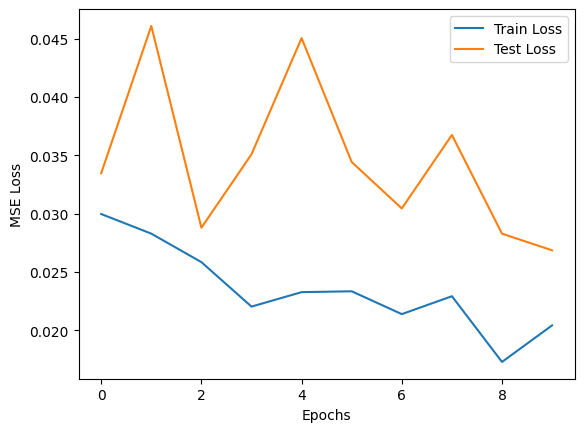

In [46]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()